In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy.external as sce
import seaborn as sns
import matplotlib as mpl
import seaborn as sns
import scipy.stats as st
from scipy import stats
from scipy.stats import norm

In [2]:
#data processed/demultiplex/classify hashtag or doublet by hashsolo
exp97=sc.read('exp97_solo.h5',gex_only=False)



In [3]:
#make array for visulize distrubution
for i in range(1,5):
    exec('H' + str(i) + "=exp97[exp97.obs['Classification']=='HTO" + str(i) +"', :]" )
    exec("h" + str(i) + "=H" + str(i) + ".obs_vector('HTO" + str(i) + "')" )
# H1=exp97[exp97.obs['Classification']=='HTO1', :]
# h1=H1.obs_vector('HTO1')

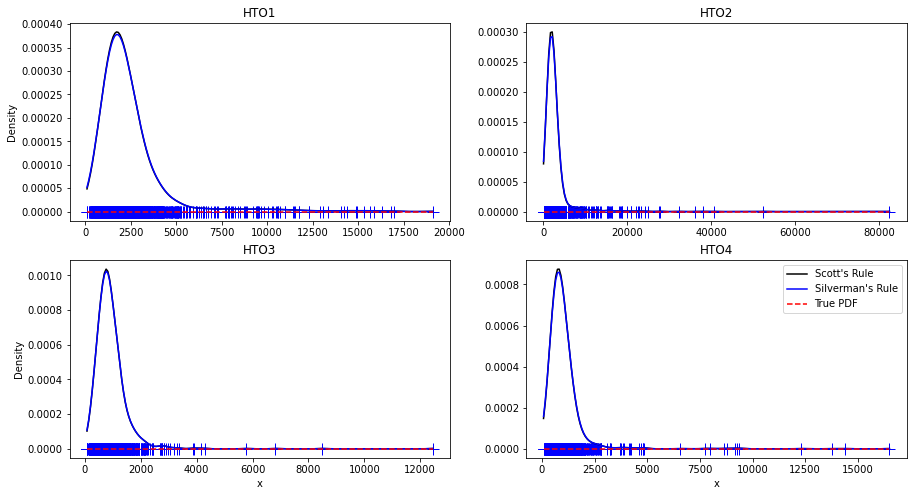

In [4]:
#visulize kde distrubution and PDF
fig = plt.figure(figsize=(15, 8))
xs = np.linspace(h1.min() - 1, h1.max() + 1, 200)

kde3 = stats.gaussian_kde(h1)
kde4 = stats.gaussian_kde(h1, bw_method='silverman')

ax1 = fig.add_subplot(221)
ax1.plot(h1, np.zeros(h1.shape), 'b+', ms=12)  # rug plot
ax1.plot(xs, kde3(xs), 'k-', label="Scott's Rule")
ax1.plot(xs, kde4(xs), 'b-', label="Silverman's Rule")
ax1.plot(xs, stats.t.pdf(xs, 5), 'r--', label="True PDF")
ax1.set_ylabel('Density')
plt.title('HTO1')

xs = np.linspace(h2.min() - 1, h2.max() + 1, 200)
kde3 = stats.gaussian_kde(h2)
kde4 = stats.gaussian_kde(h2, bw_method='silverman')
ax2 = fig.add_subplot(222)
ax2.plot(h2, np.zeros(h2.shape), 'b+', ms=12)  # rug plot
ax2.plot(xs, kde3(xs), 'k-', label="Scott's Rule")
ax2.plot(xs, kde4(xs), 'b-', label="Silverman's Rule")
ax2.plot(xs, stats.t.pdf(xs, 5), 'r--', label="True PDF")
plt.title('HTO2')

xs = np.linspace(h3.min() - 1, h3.max() + 1, 200)
kde3 = stats.gaussian_kde(h3)
kde4 = stats.gaussian_kde(h3, bw_method='silverman')
ax3 = fig.add_subplot(223)
ax3.plot(h3, np.zeros(h3.shape), 'b+', ms=12)  # rug plot
ax3.plot(xs, kde3(xs), 'k-', label="Scott's Rule")
ax3.plot(xs, kde4(xs), 'b-', label="Silverman's Rule")
ax3.plot(xs, stats.t.pdf(xs, 5), 'r--', label="True PDF")
ax3.set_xlabel('x')
ax3.set_ylabel('Density')
plt.title('HTO3')

xs = np.linspace(h4.min() - 1, h4.max() + 1, 200)
kde3 = stats.gaussian_kde(h4)
kde4 = stats.gaussian_kde(h4, bw_method='silverman')
ax3 = fig.add_subplot(224)
ax3.plot(h4, np.zeros(h4.shape), 'b+', ms=12)  # rug plot
ax3.plot(xs, kde3(xs), 'k-', label="Scott's Rule")
ax3.plot(xs, kde4(xs), 'b-', label="Silverman's Rule")
ax3.plot(xs, stats.t.pdf(xs, 5), 'r--', label="True PDF")
ax3.set_xlabel('x')
plt.title('HTO4')
plt.legend()

/Users/ycheng/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ycheng/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ycheng/opt/anaconda3/envs/scanpy/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a

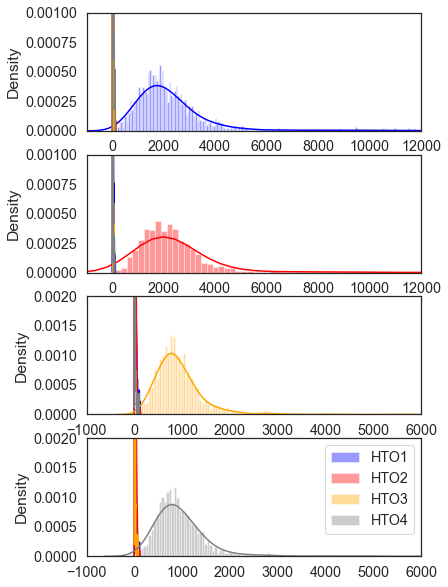

In [14]:
#visulize hto histogram
fig=plt.figure(figsize=(6,10))
sns.set(font_scale=1.3) 
sns.set_style("white")
ax1 = fig.add_subplot(411)

ax1 = sns.distplot(H1.obs_vector('HTO1'),
             color = 'blue',bins=round(len(H1)/5),norm_hist=True
             ,label='1')
ax1 =sns.distplot(H1.obs_vector('HTO2'),
             color = 'red',bins=round(len(H1)/5),norm_hist=True
             ,label='2')
ax1 =sns.distplot(H1.obs_vector('HTO3'),
             color = 'orange',bins=round(len(H1)/5),norm_hist=True
             ,label='3')
ax1 =sns.distplot(H1.obs_vector('HTO4'),
             color = 'grey',bins=round(len(H1)/5),norm_hist=True
             ,label='4')
ax1.set_ylabel('Density')
plt.ylim(0,0.001)
plt.xlim(-1000,12000)
# plt.legend()

ax2 = fig.add_subplot(412)

ax2 = sns.distplot(H2.obs_vector('HTO1'),
             color = 'blue',bins=round(len(H2)/5),norm_hist=True
             ,label='1')
ax2 = sns.distplot(H2.obs_vector('HTO2'),
             color = 'red',bins=round(len(H2)/5),norm_hist=True
             ,label='2')
ax2 = sns.distplot(H2.obs_vector('HTO3'),
             color = 'orange',bins=round(len(H2)/5),norm_hist=True
             ,label='3')
ax2 = sns.distplot(H2.obs_vector('HTO4'),
             color = 'grey',bins=round(len(H2)/5),norm_hist=True
             ,label='4')

plt.ylim(0,0.001)
plt.xlim(-1000,12000)
# plt.legend()

ax3 = fig.add_subplot(413)

ax3 = sns.distplot(H3.obs_vector('HTO1'),
             color = 'blue',bins=round(len(H2)/5),norm_hist=True
             ,label='HTO1')
ax3 = sns.distplot(H3.obs_vector('HTO2'),
             color = 'red',bins=round(len(H2)/5),norm_hist=True
             ,label='HTO2')
ax3 = sns.distplot(H3.obs_vector('HTO3'),
             color = 'orange',bins=round(len(H2)/5),norm_hist=True
             ,label='HTO3')
ax3 = sns.distplot(H3.obs_vector('HTO4'),
             color = 'grey',bins=round(len(H2)/5),norm_hist=True
             ,label='HTO4')
ax3.set_ylabel('Density')
plt.ylim(0,0.002)
plt.xlim(-1000,6000)
# plt.legend()

ax4 = fig.add_subplot(414)

ax4 = sns.distplot(H4.obs_vector('HTO1'),
             color = 'blue',bins=round(len(H4)/5),norm_hist=True
             ,label='HTO1')
ax4 = sns.distplot(H4.obs_vector('HTO2'),
             color = 'red',bins=round(len(H4)/5),norm_hist=True
             ,label='HTO2')
ax4 = sns.distplot(H4.obs_vector('HTO3'),
             color = 'orange',bins=round(len(H4)/5),norm_hist=True
             ,label='HTO3')
ax4 = sns.distplot(H4.obs_vector('HTO4'),
             color = 'grey',bins=round(len(H4)/5),norm_hist=True
             ,label='HTO4')
plt.ylim(0,0.002)
plt.xlim(-1000,6000)
plt.legend()

(0.0, 300.0)

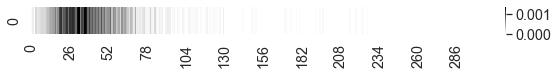

In [47]:
fig=plt.figure(figsize=(10,0.5))
sns.heatmap([a[0]],cmap='binary')
plt.xlim(0,300)

In [44]:
a=np.histogram(H4.obs_vector('HTO4'),density=True,bins=round(len(H4)/2))


In [37]:
a[0]

array([4.87074642e-05, 1.33945488e-04, 1.82652991e-04, 2.07006663e-04,
       3.65305877e-04, 4.38367305e-04, 5.84489403e-04, 7.18434891e-04,
       9.13265218e-04, 1.01067901e-03, 9.25442087e-04, 1.09591826e-03,
       1.13244756e-03, 9.01088348e-04, 1.16897813e-03, 9.86326435e-04,
       7.91496522e-04, 7.67142783e-04, 7.54964173e-04, 6.94081566e-04,
       5.84489739e-04, 5.47959131e-04, 5.11428522e-04, 3.89659826e-04,
       4.14012611e-04, 4.14013565e-04, 2.07006783e-04, 2.80068000e-04,
       1.94829913e-04, 9.74147320e-05, 1.58299304e-04, 6.08843479e-05,
       1.09591826e-04, 1.09591826e-04, 6.08842075e-05, 4.87074783e-05,
       8.52380870e-05, 4.87073660e-05, 3.65306929e-05, 3.65305245e-05,
       1.21768976e-05, 2.43536830e-05, 3.65305245e-05, 2.43537953e-05,
       3.65305245e-05, 2.43537953e-05, 1.21768415e-05, 2.43537953e-05,
       2.43536830e-05, 2.43536830e-05, 2.43537953e-05, 4.87073660e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      